In [14]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-09 14:05:37--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-02-09 14:05:38 (10.2 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [15]:
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip


--2024-02-09 14:05:38--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.112, 52.219.113.32, 52.219.117.128, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55561373 (53M) [application/zip]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>]  52.99M  12.7MB/s    in 4.2s    

2024-02-09 14:05:43 (12.7 MB/s) - ‘train.zip.1’ saved [55561373/55561373]

--2024-02-09 14:05:43--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.121.80, 52.219.193.120, 52.219.113.160, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.121.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162

In [16]:
from helper_functions import *

In [17]:
unzip_data("train.zip")
unzip_data("validation.zip")

In [18]:
import tensorflow as tf
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [51]:
def get_image_path(dir):
  image_path = []
  for root, dirs, files in os.walk(dir):
    for f in files:
      path = os.path.join(root, f)
      image_path.append(path)

  image_path.sort()
  return image_path


In [52]:
train_data_path = get_image_path("train_combined/images")
train_mask_path = get_image_path("train_combined/masks")

validation_data_path = get_image_path("validation/images")
validation_mask_path = get_image_path('validation/masks')

In [54]:
train_data_path[0], train_mask_path[0]

('train_combined/images/0_run6_cam1_00000_data_pack2.jpeg',
 'train_combined/masks/0_run6_mask_00000_data_pack2.png')

(-0.5, 255.5, 255.5, -0.5)

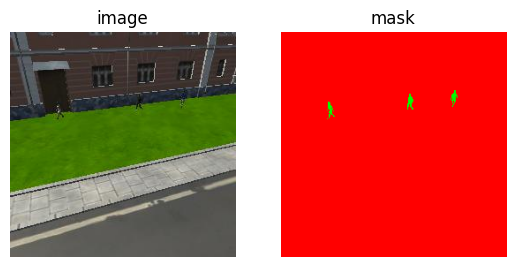

In [53]:

index = random.randint(0, len(train_data_path)-1)
train_img = mpimg.imread(train_data_path[index])
train_msk = mpimg.imread(train_mask_path[index])

plt.subplot(1, 2, 1)
plt.imshow(train_img)
plt.title('image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(train_msk)
plt.title('mask')
plt.axis(False)

In [22]:
def load_images(images_path):
  images = []
  for path in tqdm(images_path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3, dtype=tf.uint8)
    images.append(image)

  return images


In [55]:
train_data = load_images(train_data_path)
train_mask = load_images(train_mask_path)
validation_data = load_images(validation_data_path)
validation_mask = load_images(validation_mask_path)

100%|██████████| 1184/1184 [00:00<00:00, 1239.37it/s]


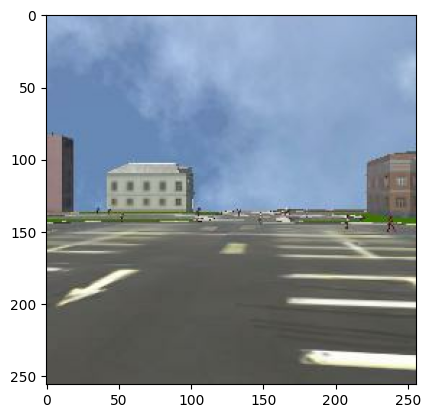

In [56]:
plt.imshow(train_data[0])

# Data preprocessing functions

In [62]:
def resize(image, IMG_SIZE=128, is_mask=False):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  if is_mask:
    image = tf.cast(image, dtype=tf.uint8) / 255
  else:
    image = tf.cast(image, dtype=tf.float32) / 255.

  return image



In [69]:
X_train = [resize(image) for image in train_data]
y_train = [resize(image, is_mask=True) for image in train_mask]
X_val = [resize(image) for image in validation_data]
y_val = [resize(image, is_mask=True) for image in validation_mask]


In [71]:
X_train[0].shape, X_train[1].dtype, X_train[1]

(TensorShape([128, 128, 3]),
 tf.float32,
 <tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[0.32647058, 0.31960785, 0.27745098],
         [0.34019607, 0.32254902, 0.28431374],
         [0.34705883, 0.3107843 , 0.27941176],
         ...,
         [1.        , 0.9980392 , 0.97843134],
         [1.        , 0.9990196 , 0.972549  ],
         [1.        , 1.        , 0.9705882 ]],
 
        [[0.35196078, 0.35980392, 0.33039215],
         [0.31666666, 0.3137255 , 0.2882353 ],
         [0.33529413, 0.3156863 , 0.29509804],
         ...,
         [0.9990196 , 0.9970588 , 0.98039216],
         [0.9990196 , 0.9970588 , 0.9794118 ],
         [0.9990196 , 0.9970588 , 0.9764706 ]],
 
        [[0.3480392 , 0.35392156, 0.33333334],
         [0.2990196 , 0.29705882, 0.27941176],
         [0.31960785, 0.30294117, 0.2901961 ],
         ...,
         [0.98333335, 0.9990196 , 0.96960783],
         [0.98333335, 0.9990196 , 0.96862745],
         [0.98333335, 0.9990196 , 0.96666664]],
 
     

In [72]:
y_train[0].shape, y_train[0].dtype, y_train[0]

(TensorShape([128, 128, 3]),
 tf.float32,
 <tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        ...,
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
      

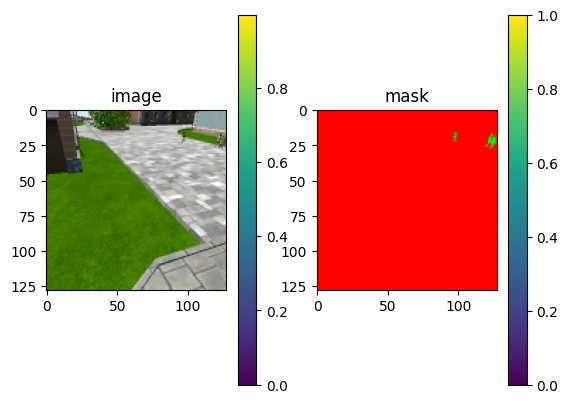

In [78]:
index = random.randint(0, len(X_train))


plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("image")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(y_train[index])
plt.title('mask')
plt.colorbar()

In [80]:
# turn data to tf dataset objects
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [81]:
X_train, X_val

(<_TensorSliceDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>,
 <_TensorSliceDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>)

## Data Augmentation

In [82]:
def brighness(img , mask, b=0.1):
  img = tf.image.adjust_brightness(img, b)
  return img, mask

def gamma(img, mask, g=0.1):
  img = tf.image.adjust_gamma(img, g)
  return img, mask


def hue(img, mask, h=-0.1):
  img = tf.image.adjust_hue(img, h)
  return img, mask

def crop(img, mask, c=0.7):
  img = tf.image.central_crop(img, 0.7)
  img = tf.image.resize(img, (128, 128))
  mask = tf.image.central_crop(img, 0.7)
  mask = tf.image.resize(mask, (128, 128))
  mask = tf.cast(mask, dtype=tf.uint8)
  return img, mask

def flip_hori(img, mask):
  img = tf.image.flip_left_right(img)
  mask = tf.image.flip_left_right(mask)
  return img, mask


def flip_vert(img, mask):
  img = tf.image.flip_up_down(img)
  mask = tf.image.flip_up_down(img)
  return img, mask


def rotate(img, mask):
  img = tf.image.rot90(img)
  mask = tf.image.rot90(mask)
  return img, mask